# AI-CA5-Clustering


### Name: Ali Sadeghi Maharluee
### Student Num: 810102471

# Song Lyrics Clustering Analysis

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, homogeneity_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string
import warnings
warnings.filterwarnings('ignore')

install requirements:

In [83]:
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
from lyricFuncs import load_and_explore_data
from lyricFuncs import preprocess_dataset

First we load our data:

In [85]:
df = load_and_explore_data('musicLyrics.csv')

Dataset shape: (2999, 1)
Column names: ['Lyric']
Missing values: 0

First 3 lyrics samples:

Sample 1:
Cryptic psalms Amidst the howling winds A scorching source of agonizing bliss Beneath its veil Mysteries of a life beyond Can you hear it? Sons and daughters with hearts ablaze Forsaken ones in deaths...

Sample 2:
Im sleeping tonight with all the wolves Were dreaming of life thats better planned As long as the wind that falls isnt longing for revenge I should be safe We should be safe Shes two bitter ends So wa...

Sample 3:
Wings of the darkest descent Fall from the realm of dark From the blackest fall of creation Doomed by its end Winds of chaos blow through my soul Wings of the darkest descent shall fall Lurking evil s...


Then we preproccess the text in our data

In [86]:
df = preprocess_dataset(df)


TEXT PREPROCESSING

Applying cleaned_only preprocessing...

Applying cleaned_no_stopwords preprocessing...

Applying cleaned_lemmatized preprocessing...

Applying cleaned_stemmed preprocessing...

Preprocessing Examples:
Original: Cryptic psalms Amidst the howling winds A scorching source of agonizing bliss Beneath its veil Mysteries of a life beyond Can you hear it? Sons and daughters with hearts ablaze Forsaken ones in deaths...
cleaned_only: cryptic psalms amidst the howling winds a scorching source of agonizing bliss beneath its veil mysteries of a life beyond can you hear it sons and daughters with hearts ablaze forsaken ones in deaths ...
cleaned_no_stopwords: cryptic psalms amidst howling winds scorching source agonizing bliss beneath veil mysteries life beyond hear sons daughters hearts ablaze forsaken ones deaths embrace chant hymn behold awe blessed cur...
cleaned_lemmatized: cryptic psalm amidst howling wind scorching source agonizing bliss beneath veil mystery life beyond 

Choose best preprocessing method

In [87]:
best_preprocessing = 'Lyric_cleaned_lemmatized'

Extract features

In [90]:
from lyricFuncs import extract_features
features = extract_features(df[best_preprocessing].tolist())


FEATURE EXTRACTION
Loading SentenceTransformer model: all-MiniLM-L6-v2
Extracting features from text data...


Batches:   0%|          | 0/94 [00:00<?, ?it/s]

Feature extraction complete!
Feature vector shape: (2999, 384)
Each text is represented by 384 features


Initialize clustering analyzer

In [91]:
from lyricFuncs import ClusteringAnalyzer

analyzer = ClusteringAnalyzer(features)

Find optimal K using elbow method


ELBOW METHOD FOR K-MEANS


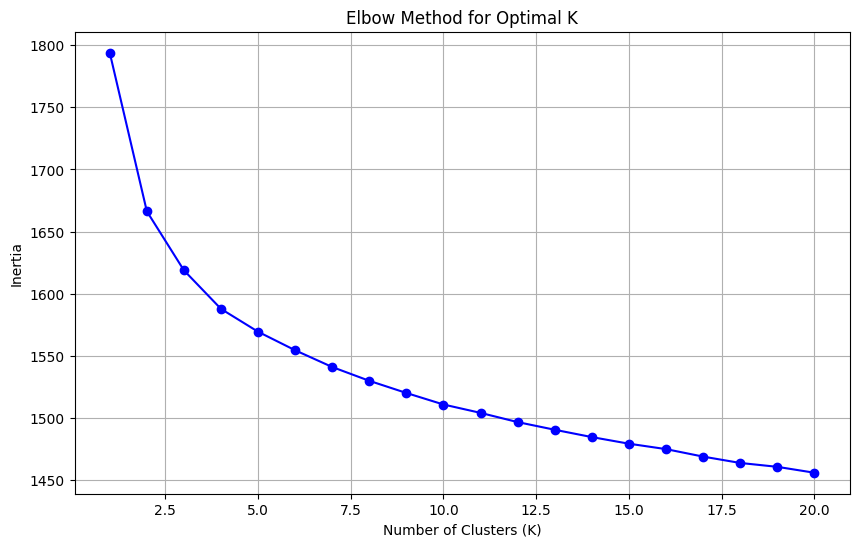

In [92]:
k_range, inertias = analyzer.elbow_method(max_k=20)

seems that the best k (the elbow) is 4 or 5. so we test our KMeans algorithm for k=4 and k=5

## Perform clustering with different algorithms

In [93]:
kmeans_labels = analyzer.kmeans_clustering(n_clusters=4)


Performing K-Means clustering with 4 clusters...


In [94]:
dbscan_labels = analyzer.dbscan_clustering(eps=0.6, min_samples=10)


Performing DBSCAN clustering with eps=0.6, min_samples=10...
DBSCAN found 1 clusters


In [95]:
hierarchical_labels = analyzer.hierarchical_clustering(n_clusters=4)


Performing Hierarchical clustering with 4 clusters...


Dimensionality reduction for visualization

In [96]:
from lyricFuncs import perform_pca

features_2d, pca = perform_pca(features, n_components=2)


DIMENSIONALITY REDUCTION (PCA)
Original features shape: (2999, 384)
Reduced features shape: (2999, 2)
Explained variance ratio: [0.09424974 0.04659624]
Total explained variance: 0.141


## Visualize clusters

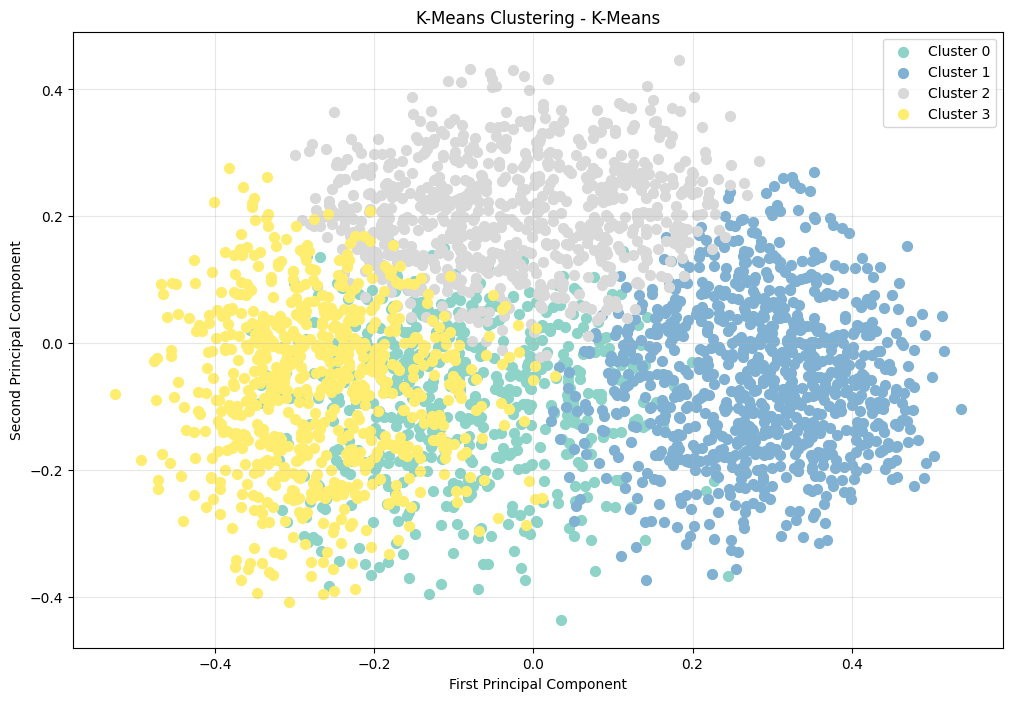

In [97]:
from lyricFuncs import visualize_clusters

visualize_clusters(features_2d, kmeans_labels, "K-Means Clustering", "K-Means")

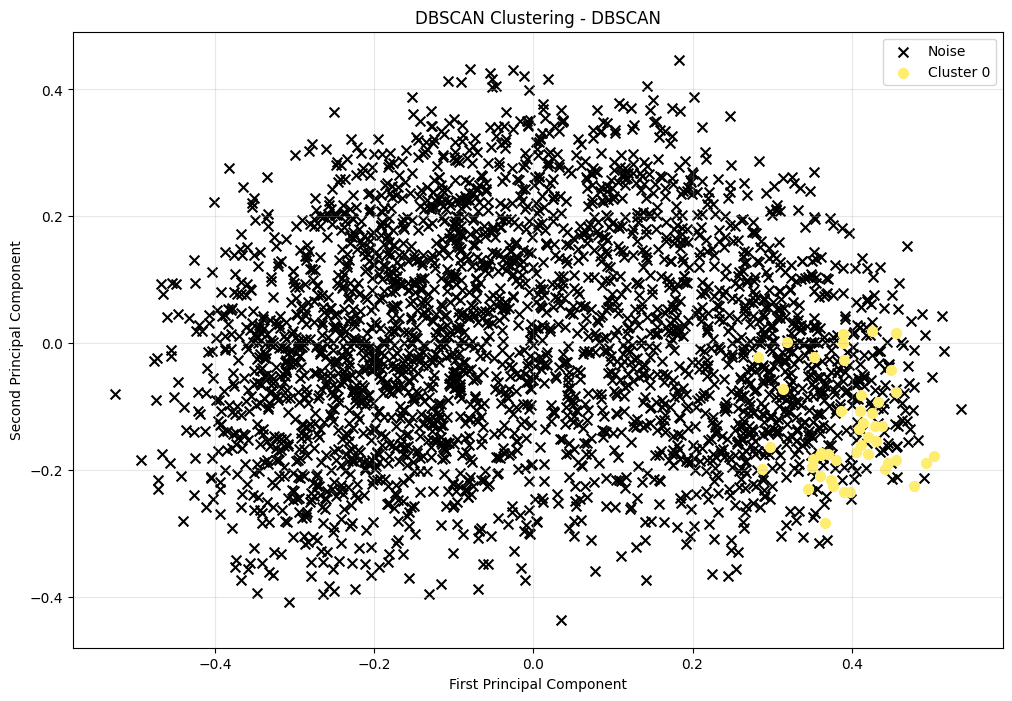

In [98]:
visualize_clusters(features_2d, dbscan_labels, "DBSCAN Clustering", "DBSCAN")

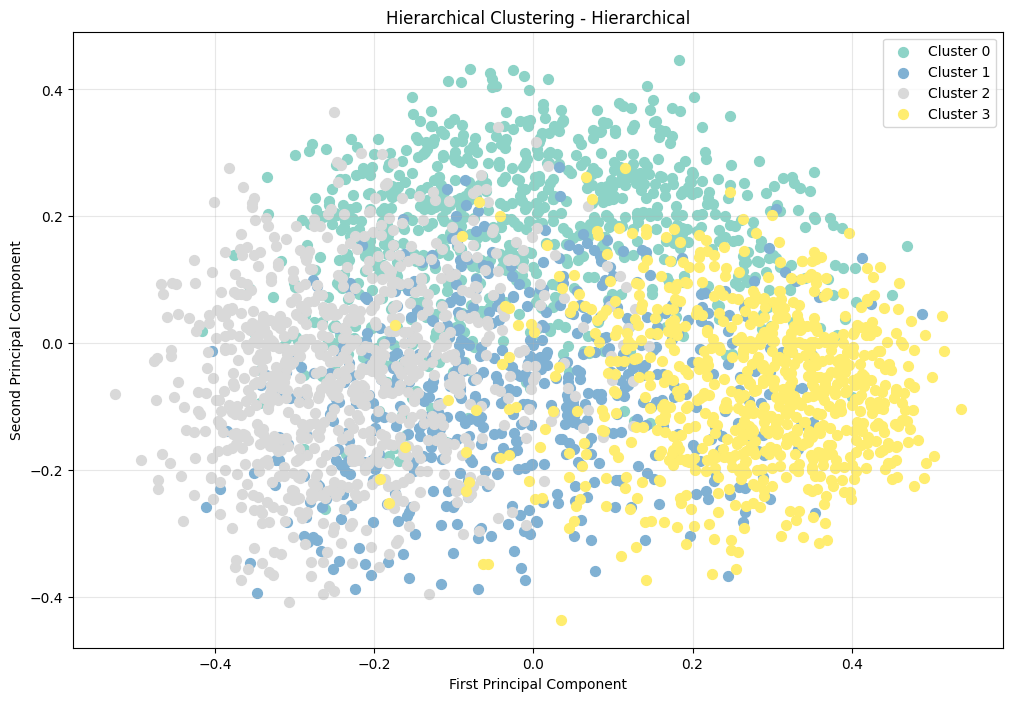

In [99]:
visualize_clusters(features_2d, hierarchical_labels, "Hierarchical Clustering", "Hierarchical")

Evaluate clustering results

In [106]:
from lyricFuncs import calculate_metrics


methods = {
    'K-Means': kmeans_labels,
    'DBSCAN': dbscan_labels,
    'Hierarchical': hierarchical_labels
}

results_summary = {}

for method_name, labels in methods.items():
    metrics = calculate_metrics(features, labels)
    results_summary[method_name] = metrics

    print(f"\n{method_name} Results:")
    print(f"  Silhouette Score: {metrics['silhouette']:.3f}")
    print(f"  Number of Clusters: {metrics['n_clusters']}")
    print(f"  Noise Points: {metrics['noise_points']}")


K-Means Results:
  Silhouette Score: 0.049
  Number of Clusters: 4
  Noise Points: 0

DBSCAN Results:
  Silhouette Score: -1.000
  Number of Clusters: 1
  Noise Points: 2953

Hierarchical Results:
  Silhouette Score: 0.032
  Number of Clusters: 4
  Noise Points: 0


Analyze samples from each cluster

In [107]:
from lyricFuncs import analyze_cluster_samples

analyze_cluster_samples(df, kmeans_labels, best_preprocessing, n_samples=4)


CLUSTER SAMPLE ANALYSIS

--- Cluster 0 (Size: 584) ---
Sample 1: im phone hello hello arrivederci sample include excerpt casino dir martin scorsese close encounter third kind dir steven spielberg know sometimes prepared adversity happens sometimes caught short dont...
Sample 2: alright party night friend came party bang bang gang blow whistle party night party night come people gon na show rock come people gon na show got come people gon na show rock blow whistle come people...
Sample 3: eight mile high touch youll find stranger known sign street say youre going somewhere nowhere warmth found among afraid losing ground raingrey town known sound embrace small face abound round square s...
Sample 4: ask question there multiple choice youve one shot get right say distance voice dont get head spin could see mess youre enemy closing see white eye he taking prey sight matter time may game begin best ...

--- Cluster 1 (Size: 934) ---
Sample 1: blame try shame still ill care run around even 

This clustring works well (why? see the Report)

In [108]:
analyze_cluster_samples(df, hierarchical_labels, best_preprocessing, n_samples=4)


CLUSTER SAMPLE ANALYSIS

--- Cluster 0 (Size: 803) ---
Sample 1: heart go bang night close friend told never let heart falll careless hand said thanks thats nice appreciate good advice thing dont always go way planned oh take heart shake take heart break get doctor...
Sample 2: verse young first saw close eye flashback start im standing balcony summer air see light see party ball gown see make way crowd say hello little know prechorus romeo throwing pebble daddy said stay aw...
Sample 3: there cold eye he waiting fall hope forum new world gone stand edge vision clear courage one last step time come one decision wrong right end tunnel show light also path far away paradise follow star ...
Sample 4: well want collapsing star ill wait ill wait good else dont want ghost dont want fading light dont want weight carry want man come home every night well want dont someone youre kid wouldnt know u dont ...

--- Cluster 1 (Size: 582) ---
Sample 1: produced j dilla chorus ayo yall dance real slo

This method of clustering is also good but not as Kmeans (why? see the report.)

Find best method based on silhouette score

In [109]:
best_method = max(results_summary.keys(),
          key=lambda x: results_summary[x]['silhouette'])

print(f"Best performing method: {best_method}")
print(f"Best silhouette score: {results_summary[best_method]['silhouette']:.3f}")

Best performing method: K-Means
Best silhouette score: 0.049
